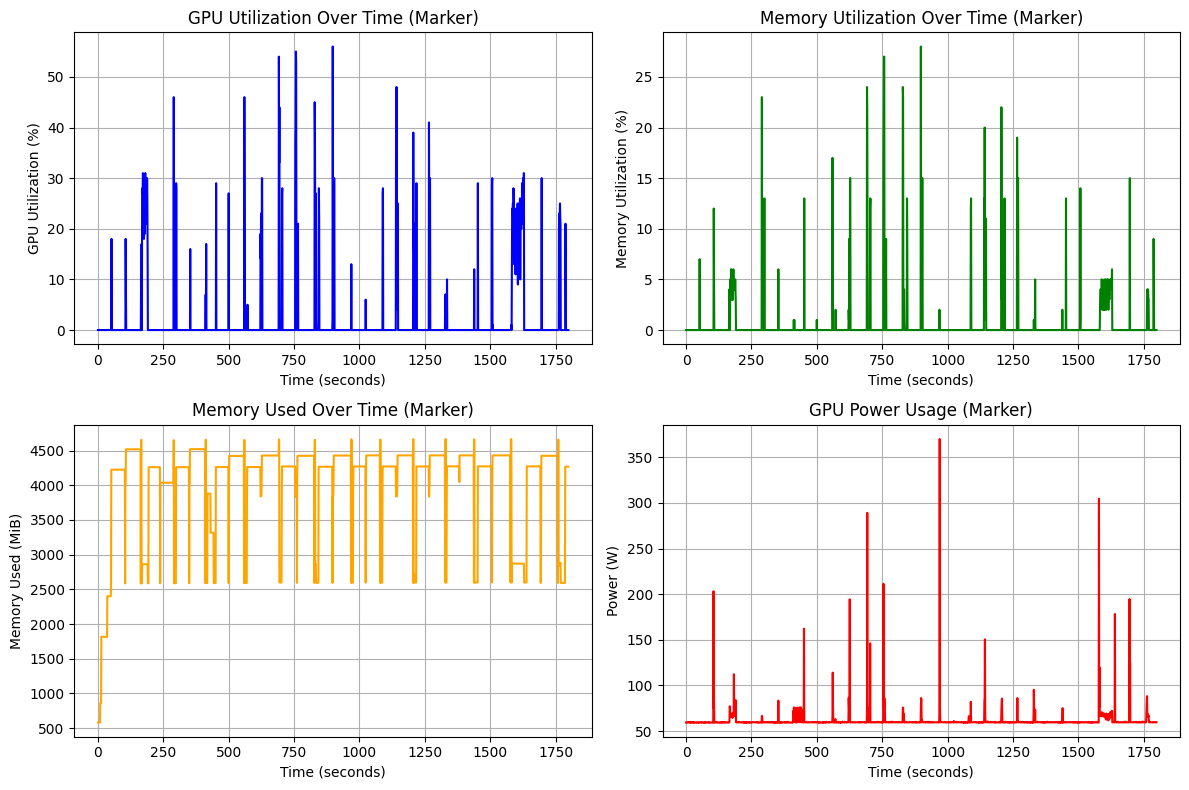

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to filter out the repeated header rows and keep only the first GPU (index == 0)
def clean_data(file_path):
    # Load the CSV data
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Filter lines for only GPU 0 (first row after each timestamp)
    clean_lines = []
    for line in lines:
        # Skip repeated header lines and take only lines where the GPU index is 0
        if not line.startswith("timestamp") and ', 0, ' in line:
            clean_lines.append(line)
    
    # Create a DataFrame from the cleaned lines
    data = pd.DataFrame([line.strip().split(', ') for line in clean_lines], columns=[
        'timestamp', 'index', 'name', 'utilization.gpu', 'utilization.memory', 'memory.total', 'memory.used', 'temperature.gpu', 'power.draw',
    ])
    
    return data

# Load and clean the data
csv_file = 'marker_gpu_logs.csv'  # Replace with the actual file path
data = clean_data(csv_file)

# Remove '%' and 'MiB' from relevant columns and convert to numeric
data['utilization.gpu'] = data['utilization.gpu'].str.replace(' %', '').astype(float)
data['utilization.memory'] = data['utilization.memory'].str.replace(' %', '').astype(float)
data['memory.used'] = data['memory.used'].str.replace(' MiB', '').astype(float)
data['memory.total'] = data['memory.total'].str.replace(' MiB', '').astype(float)
data['temperature.gpu'] = data['temperature.gpu'].astype(float)
data['power.draw'] = data['power.draw'].str.replace(" W", '').astype(float)

# Generate a range for the x-axis (simple range since we don’t need exact timestamps)
time_range = range(len(data))  # X-axis will just be the index of the rows

# Plot GPU utilization
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_range, data['utilization.gpu'], label='GPU Utilization (%)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Utilization Over Time (Marker)')
plt.grid(True)

# Plot memory utilization
plt.subplot(2, 2, 2)
plt.plot(time_range, data['utilization.memory'], label='Memory Utilization (%)', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Utilization (%)')
plt.title('Memory Utilization Over Time (Marker)')
plt.grid(True)

# Plot memory used
plt.subplot(2, 2, 3)
plt.plot(time_range, data['memory.used'], label='Memory Used (MiB)', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Used (MiB)')
plt.title('Memory Used Over Time (Marker)')
plt.grid(True)

# Plot GPU temperature
plt.subplot(2, 2, 4)
plt.plot(time_range, data['power.draw'], label='Power (W)', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Power (W)')
plt.title('GPU Power Usage (Marker)')
plt.grid(True)

# Adjust layout for better display
plt.tight_layout()

# Show plot
plt.show()